# Linear Regression

### Import Libraries

In [1]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Set Eager API

In [2]:
tf.enable_eager_execution()
tfe = tf.contrib.eager

### Set Parameters 

In [3]:
learning_rate = 0.01
display_step = 100
num_step = 1000

### Create Dataset

In [4]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
n_samples = len(train_X)

#### Weight and Bias

In [5]:
W = tfe.Variable(np.random.randn())
b = tfe.Variable(np.random.randn())

### Linear Regression

In [6]:
def linear_regression(x):
    return W * x + b

In [7]:
#Mean Square error
def mean_square(model_fn, x, y):
    return tf.reduce_sum(tf.pow(model_fn(x) - y, 2)) / (2 * n_samples)

### SGD Optimizer

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
grad = tfe.implicit_gradients(mean_square)

### Initital cost before optimizing

In [9]:
print("Initial cost= {:.9f}".format(
    mean_square(linear_regression, train_X, train_Y)),
    "W=", W.numpy(), "b=", b.numpy())

Initial cost= 20.270126343 W= -0.73342746 b= 1.0129997


### Training

In [10]:
for step in range(num_step):
    
    optimizer.apply_gradients(grad(linear_regression, train_X, train_Y))
    
    if (step+1) % display_step == 0 or step == 0:
        print("Epoch:", '%04d' % (step + 1), "cost=",
              "{:.9f}".format(mean_square(linear_regression, train_X, train_Y)),
              "W=", W.numpy(), "b=", b.numpy())

Epoch: 0001 cost= 6.154873848 W= -0.31056264 b= 1.0722172
Epoch: 0100 cost= 0.082749605 W= 0.20838061 b= 1.105455
Epoch: 0200 cost= 0.081494287 W= 0.21332762 b= 1.070383
Epoch: 0300 cost= 0.080509700 W= 0.21770883 b= 1.0393221
Epoch: 0400 cost= 0.079737462 W= 0.22158892 b= 1.0118139
Epoch: 0500 cost= 0.079131760 W= 0.22502531 b= 0.98745155
Epoch: 0600 cost= 0.078656681 W= 0.22806865 b= 0.9658756
Epoch: 0700 cost= 0.078284048 W= 0.23076397 b= 0.946767
Epoch: 0800 cost= 0.077991776 W= 0.23315099 b= 0.9298441
Epoch: 0900 cost= 0.077762544 W= 0.23526497 b= 0.9148569
Epoch: 1000 cost= 0.077582762 W= 0.23713721 b= 0.90158355


### Visualize

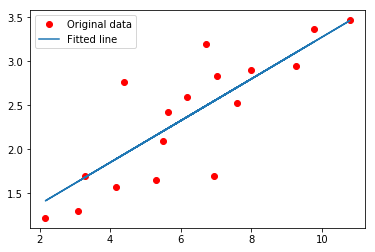

In [11]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, np.array(W * train_X + b), label='Fitted line')
plt.legend()
plt.show()